In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)


In [3]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_pred_train = np.full(y_train.shape, y_train.mean())
n_estimators = 100
learning_rate = 0.1


for i in range(n_estimators):
    residuals = y_train - y_pred_train
    tree = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree.fit(X_train, residuals)
    update = tree.predict(X_train)
    y_pred_train += learning_rate * update
    if (i + 1) % 10 == 0:
        loss = np.mean(residuals ** 2)
        print(f"Iteration {i+1}/{n_estimators} - Training Loss: {loss:.4f}")

y_pred_test = np.full(y_test.shape, y_train.mean())
for i in range(n_estimators):
    residuals = y_train - y_pred_train
    tree = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree.fit(X_train, residuals)
    update = tree.predict(X_test)
    y_pred_test += learning_rate * update

y_pred_binary = (y_pred_test >= 0.5).astype(int)



Iteration 10/100 - Training Loss: 0.0490
Iteration 20/100 - Training Loss: 0.0144
Iteration 30/100 - Training Loss: 0.0075
Iteration 40/100 - Training Loss: 0.0046
Iteration 50/100 - Training Loss: 0.0031
Iteration 60/100 - Training Loss: 0.0024
Iteration 70/100 - Training Loss: 0.0019
Iteration 80/100 - Training Loss: 0.0015
Iteration 90/100 - Training Loss: 0.0013
Iteration 100/100 - Training Loss: 0.0010


In [8]:
print("\nModel Evaluation Results:")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Precision:", precision_score(y_test, y_pred_binary))
print("Recall:", recall_score(y_test, y_pred_binary))
print("F1 Score:", f1_score(y_test, y_pred_binary))
print("ROC AUC:", roc_auc_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))




Model Evaluation Results:
----------------------------
Accuracy: 0.6578947368421053
Precision: 0.6542056074766355
Recall: 0.9722222222222222
F1 Score: 0.7821229050279329
ROC AUC: 0.8913690476190476

Confusion Matrix:
 [[ 5 37]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.12      0.20        42
           1       0.65      0.97      0.78        72

    accuracy                           0.66       114
   macro avg       0.68      0.55      0.49       114
weighted avg       0.68      0.66      0.57       114



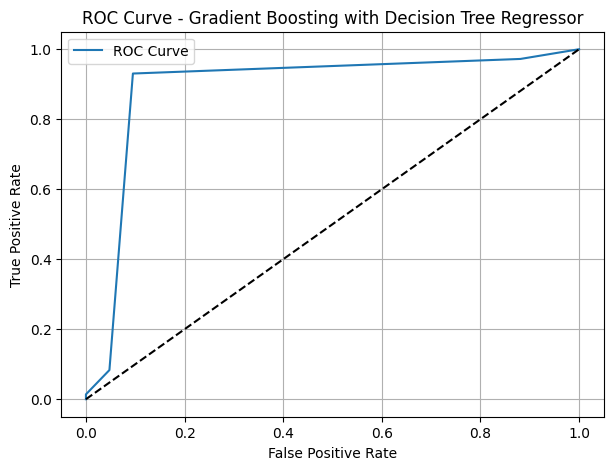

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Gradient Boosting with Decision Tree Regressor")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

